In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
jk = len(os.listdir('F:/INTERNSHIP 8 SEM/archive/data/train/'))
jk

6

#TO VISULAIZE, FIRSTLY GET CLASS NAMES

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path('F:/INTERNSHIP 8 SEM/archive/data/train/')
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name

array(['HAMEX', 'KAIST', 'MathBrush', 'MfrDB', 'expressmatch',
       'extension'], dtype='<U12')

In [5]:
class_name

array(['HAMEX', 'KAIST', 'MathBrush', 'MfrDB', 'expressmatch',
       'extension'], dtype='<U12')

In [6]:
data_dir = pathlib.Path('F:/INTERNSHIP 8 SEM/archive/data/train/')
np.array(data_dir)

array(WindowsPath('F:/INTERNSHIP 8 SEM/archive/data/train'), dtype=object)

NOW VISUALIZE IMAGES FROM CLASS NAMES


In [9]:
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import random
    
    def view_random_image(target_dir, target_class):
        target_folder = target_dir+target_class
        
        random_image = random.sample(os.listdir(target_folder),1)
        print(random_image)
        
        img  = mpimg.imread(target_folder + "/" + random_image[0])
        plt.imshow(img)
        plt.title(target_class)
        plt.axis("off");
        print(f"Image shape: {img.shape}") #shape of image
            
        return img

In [10]:
import pytesseract
from PIL import Image


['90_caue.png']
Image shape: (256, 256)


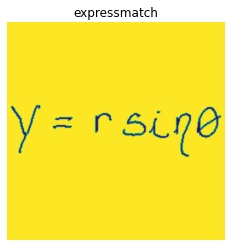

In [17]:
img = view_random_image(target_dir = 'F:/INTERNSHIP 8 SEM/archive/data/train/',
                       target_class = 'expressmatch')      



In [18]:
import pytesseract
from PIL import Image

# Extract text from image using pytesseract
text = pytesseract.image_to_string(img)

# Print the extracted text
print(text)


OSError: cannot write mode F as PNG

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
image_dir ='F:/INTERNSHIP 8 SEM/archive/data/train/'
image_dir

'F:/INTERNSHIP 8 SEM/archive/data/train/'

In [21]:
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.99)
datagen

In [22]:
train_data = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)
 # Load the validation data
val_data = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
 

Found 91 images belonging to 6 classes.
Found 8744 images belonging to 6 classes.


In [23]:
#build cnn model 

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 50,
                          kernel_size = 5,
                          activation = "relu",
                          input_shape=(256,256,1)),
    tf.keras.layers.Conv2D(filters = 50,
                           kernel_size = 5,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                            padding = "valid"),
    tf.keras.layers.Conv2D(30,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(30,kernel_size=3,activation= "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation = "softmax")
    
])
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [ ]:
fit = model.fit(train_data,epochs=2,verbose=1,shuffle=True,steps_per_epoch=len(train_data), validation_data=val_data)

Epoch 1/2


In [30]:
class_name[img[100][3]]

IndexError: index 255 is out of bounds for axis 0 with size 6

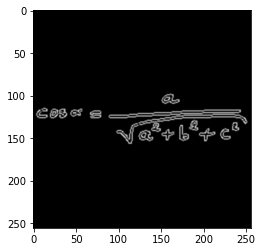

In [19]:
import cv2

# Load the math formula image
img = cv2.imread("F:/INTERNSHIP 8 SEM/archive/data/train/expressmatch/98_alfonso.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Display the edges
plt.imshow(edges, cmap = 'gray', interpolation = 'bicubic')



In [16]:
pip install opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
print(img)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [8]:
np.array(img)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [9]:
img.shape

(256, 256)

In [10]:
img

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [11]:
num_of_imageTrain_steak_ = len(os.listdir('F:/INTERNSHIP 8 SEM/archive/data/train/MathBrush'))
num_of_imageTrain_steak_

2989

In [12]:
num_of_imageTrain_steak_ = len(os.listdir('F:/INTERNSHIP 8 SEM/archive/data/train/MfrDB'))
num_of_imageTrain_steak_

1666

In [13]:
tf.constant(img)

<tf.Tensor: shape=(256, 256), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [14]:
img[:2].shape

(2, 256)

In [15]:

img/255.

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]], dtype=float32)

# creating data pipelines

In [16]:
import tensorflow as tf
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [17]:
data = tf.keras.utils.image_dataset_from_directory('F:/INTERNSHIP 8 SEM/archive/data/train/')
data

Found 8835 files belonging to 6 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [19]:
batch = data_iterator.next()

In [20]:
len(batch[0])

32

In [21]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [22]:
scaled =  batch[0]/255
scaled

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [23]:
len(data)

277

In [45]:
pip install gensim

In [38]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [4]:
from gensim import  

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import cv2

# Load the math formula image
img = cv2.imread(".png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Display the edges
cv2.imshow("Edges", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
